<a href="https://colab.research.google.com/github/RichaRashmi-projects/Fasta-File-Formatting/blob/master/amino_acid_composition_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Code help in calculating the amino acid composition for all the sequences in a multi-sequence protein fasta file.

In [1]:
!pip install Biopython

In [2]:
#import the libraries
import numpy as np
import pandas as pd # for data processing
import matplotlib.pyplot as plt # for plotting
from Bio import SeqIO # for handing fasta file
from Bio.SeqUtils.ProtParam import ProteinAnalysis # for performing protein sequence analysis

In [3]:
#Give path to input and output files

#input file
fasta_path = "/content/drive/My Drive/THAP/THAP9/ortholog/THAP9_refseq_protein.fasta" 

#output file
out_path = "/content/drive/My Drive/THAP/THAP9/ortholog/THAP9_refseq_protein.csv"

In [4]:
#processing fasta file and calulating the amino acid composition

df = pd.DataFrame()
for record in SeqIO.parse(fasta_path, 'fasta'):
    X = ProteinAnalysis(str(record.seq))
    #print('\n### Results for record: {} ###'.format(record.id))
    #print(X.count_amino_acids()['A']) 
    #print(X.count_amino_acids()['E']) 
    #print(type(X.get_amino_acids_percent()) )
    composition = X.get_amino_acids_percent()
    #df[record.id] = composition.values()
    
    df[record.id] = pd.Series(composition)

In [5]:
df = round(df*100, 2)


In [6]:
df.head()

,NP_078948.3,XP_420555.4,XP_517186.2,XP_544956.2,NP_001231112.1,XP_001086766.1,XP_001915516.1,XP_012428772.3,XP_008265884.2,XP_008991311.1,XP_002814975.2,XP_002912514.1,XP_002935296.2,XP_003129402.1,XP_030674935.1,XP_003414163.1,XP_012996921.1,XP_003790088.3,XP_034814447.1,XP_003898734.1,XP_010333047.1,XP_003985279.1,XP_014952082.2,XP_004038945.3,XP_004282217.1,XP_004327291.2,XP_004383150.1,XP_004391629.1,XP_004430950.1,XP_023438617.1,XP_004590661.1,XP_004640377.1,XP_004681219.1,XP_012903744.1,XP_021116621.1,XP_005044938.1,XP_033920331.1,XP_005230174.1,XP_008163880.1,XP_005339375.2,...,XP_026365635.1,XP_026527076.1,XP_026559586.1,XP_026703771.1,XP_026943322.1,XP_027400712.1,XP_027455634.1,XP_027508509.1,XP_027548604.1,XP_027594338.1,XP_027743021.1,XP_027795633.1,XP_027979949.1,XP_028582360.1,XP_029091619.1,XP_029471724.1,XP_029799986.1,XP_029871779.1,XP_030072181.1,XP_030169441.1,XP_030306697.1,XP_030347194.1,XP_030420885.1,XP_030733892.1,XP_030803196.1,XP_031452544.1,XP_031963888.1,XP_032004901.1,XP_032095670.1,XP_032190649.1,XP_032256564.1,XP_032488436.1,XP_032541146.1,XP_032641596.1,XP_032733604.1,XP_032831685.1,XP_032915883.1,XP_032962159.1,XP_033004443.1,XP_033070154.1
A,5.32,10.39,5.20,5.54,5.56,5.32,5.21,8.37,6.02,5.56,5.09,5.43,6.00,5.98,5.14,5.76,4.69,5.23,5.46,5.32,5.33,5.65,5.54,5.20,5.54,5.54,5.21,5.76,5.43,6.58,6.08,5.35,5.12,6.98,4.77,9.41,8.80,7.43,6.79,5.23,...,5.76,7.32,7.24,8.34,5.43,5.45,5.76,7.86,8.08,8.45,7.84,5.11,5.76,10.02,5.54,6.19,5.65,9.24,7.01,5.65,11.68,9.43,7.09,5.43,9.49,10.88,9.42,5.20,5.13,6.42,5.76,5.54,8.09,7.08,6.21,13.62,9.88,5.67,10.09,5.37
C,2.66,3.03,2.66,3.10,2.67,2.77,3.10,2.98,3.06,2.94,2.66,3.10,2.40,2.77,3.03,2.44,3.24,2.39,2.84,2.77,3.11,3.22,2.77,2.66,2.88,2.99,2.99,3.10,2.66,2.47,2.64,2.50,2.78,2.98,3.11,2.69,3.31,3.65,3.12,2.73,...,3.22,2.71,3.85,3.11,2.88,2.67,3.10,2.89,3.12,3.36,3.34,2.77,3.10,2.64,2.99,2.43,3.22,3.11,2.76,3.10,2.92,3.44,2.97,2.88,3.09,3.51,2.72,2.88,2.73,3.21,3.22,2.99,3.01,3.10,3.44,3.32,3.03,2.78,2.82,2.97
D,4.32,2.92,4.43,4.43,3.78,4.32,4.21,3.10,4.20,4.14,4.65,4.10,5.13,4.10,4.35,4.43,4.24,4.55,4.41,4.32,4.22,4.32,3.77,4.43,4.21,4.21,4.55,4.10,4.32,4.39,4.47,3.92,4.67,4.52,4.55,2.80,3.09,3.65,3.79,3.98,...,4.10,2.98,2.62,3.86,4.21,3.78,4.10,3.47,3.46,3.47,3.58,4.11,4.10,3.19,4.21,3.76,4.43,3.11,3.91,4.32,2.92,3.11,3.89,4.21,3.09,2.95,3.29,4.32,4.36,4.76,4.10,4.21,3.47,3.76,4.66,5.20,2.92,4.00,3.04,4.22
E,4.76,4.20,4.76,4.77,5.45,4.77,5.10,5.05,5.11,4.91,4.65,5.21,6.44,4.54,4.87,4.99,4.80,5.12,4.94,4.77,4.44,4.66,5.43,4.76,4.87,4.87,5.10,4.99,4.88,4.57,4.70,5.53,5.12,4.62,4.99,5.04,4.34,5.61,4.79,5.11,...,5.10,5.15,4.93,5.11,4.87,5.45,4.99,4.28,4.39,4.17,4.50,4.99,4.99,5.84,4.87,6.53,4.55,4.83,6.55,4.66,4.87,4.88,5.14,4.87,4.80,4.42,4.77,4.87,4.47,4.65,4.99,4.87,4.28,5.09,4.66,4.65,5.05,5.44,5.64,4.91
F,5.32,4.20,5.32,4.66,5.01,5.32,4.99,3.90,5.22,5.23,5.32,4.77,4.37,4.98,5.67,5.32,5.58,4.78,5.15,5.32,5.33,4.66,5.09,5.32,4.76,4.76,5.10,4.66,4.77,4.57,5.50,5.35,4.89,4.62,5.33,3.58,4.00,3.51,4.23,5.23,...,4.77,4.88,4.78,4.11,4.76,5.01,4.66,4.62,4.50,4.51,4.27,5.33,4.66,4.30,4.76,3.54,4.77,3.76,3.22,4.66,3.16,3.66,4.34,4.76,3.66,4.08,3.86,5.32,5.23,4.87,4.66,4.76,4.51,4.31,4.88,3.77,3.82,5.33,4.34,5.37


In [7]:
mins = df.min(axis = 1)
maxes = df.max(axis = 1)
means = df.mean(axis = 1)
std = df.std(axis = 1)

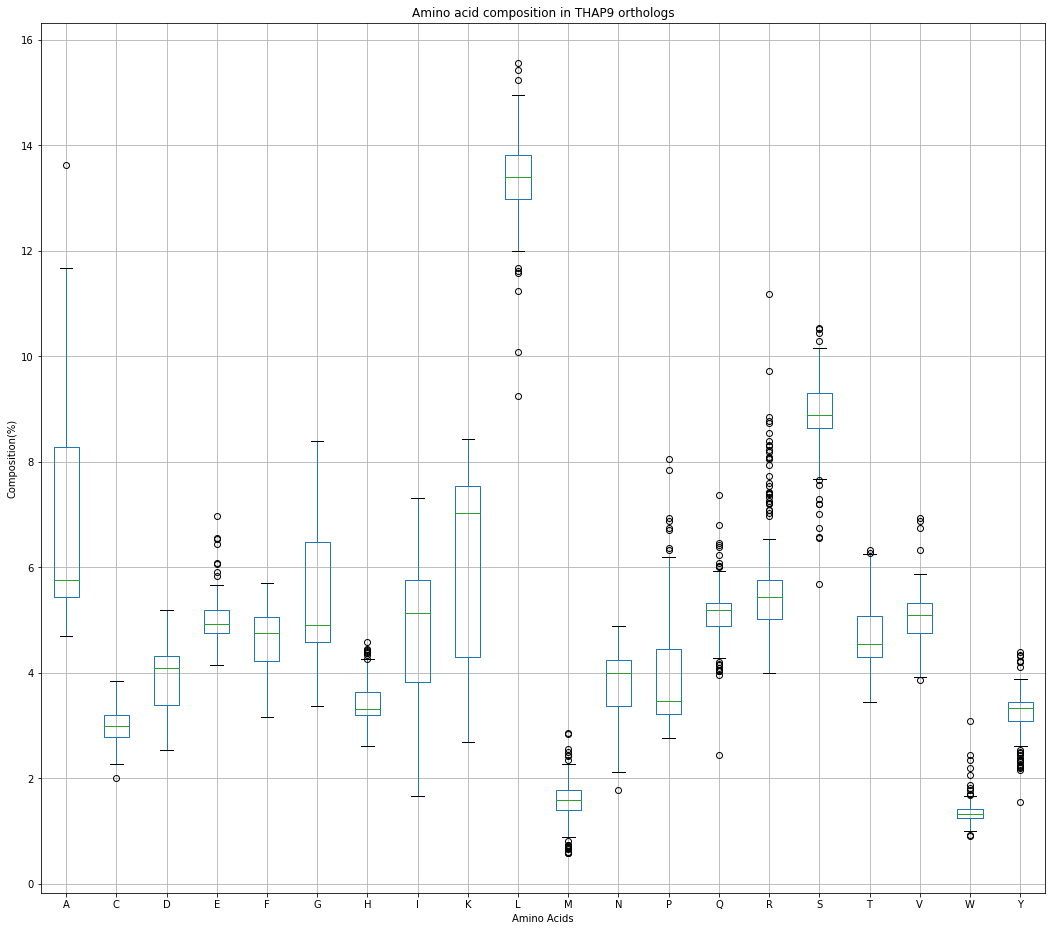

In [11]:
np.random.seed(1234)

boxplot = (df.T.boxplot(figsize=(18, 16)))

boxplot.set_title('Amino acid composition in THAP9 orthologs')
boxplot.set_xlabel('Amino Acids')
boxplot.set_ylabel('Composition(%)')
boxplot.figure.savefig('/content/drive/My Drive/THAP/THAP9/ortholog/THAP9_ortho_ACC.png', dpi = 1200)

In [9]:
df.to_csv(out_path)